In [2]:
from model.NetworkGraph import CompleteGraph

In [ ]:
potentially_aggregation_nodes = [
    "09-00023"
    "09-03083"
    "09-00268"
    "09-04361"
    "09-03163"
    "09-00195"
    "09-03649"
]

In [3]:
graph = CompleteGraph.of_sources_only_core_nodes("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 154
Discarded links: 0
Links: 55
Nodes: 39

*-*-* Printing information about the imported network *-*-*

Num nodes: 39
Num links: 55
Num HL4: 0
Num HL5: 0
Average distance: 16.58
Max distance (km): 65.67
Min distance (km): 1.61
Average degree: 2.87
Min degree: 2
Max degree: 6
Average degree HL4: nan
Average degree HL5: nan
Total bidirectional link length (km): 911.69


/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [4]:
graph.nodes

[Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-03501', pos=(56.84341451878471, 100.58852204317228), node_degree=3, type='HL3', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['09-03501 <-> 09-03424', '09-03501 <-> 09-00085', '09-03501 <-> 09-00011'], assoc_nodes=['09-03424', '09-00085', '09-00011']),
 Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-03424', pos=(48.032259843300196, 85.73591662882794), node_degree=2, type='HL3', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['09-03501 <-> 09-03424', '09-03424 <-> 09-03163'], assoc_nodes=['09-03501', '09-03163']),
 Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-00130', pos=(67.74851671396283, 28.41705616131265), node_degree=3, type='HL3', traffic_profile='high', estimated_traffic_injection=1000, assoc_links=['09-00130 <-> 09-00571', '09-00130 <-> 09-00166', '09-00130 <-> 09-00914'], assoc_nodes=['09-00571', '09-00166', '09-00914']),
 Node(id='6d319df76f4645e3ba00a46b50c919ec', n

In [5]:
all_node_types = [node.type for node in graph.nodes]
all_node_types

['HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL3',
 'HL2-1',
 'HL2-1',
 'HL2-1',
 'HL2-1',
 'HL2-1',
 'HL2-1']

In [6]:
print(f'HL2-1: {len([node for node in graph.nodes if node.type == "HL2-1"])}')
print(f'HL3: {len([node for node in graph.nodes if node.type == "HL3"])}')

HL2-1: 6
HL3: 33


In [7]:
graph.links

[Link(id='18673228d1a5443daf74c3b5516ec652', a=Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-03501', pos=(56.84341451878471, 100.58852204317228), node_degree=3, type='HL3', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['09-03501 <-> 09-03424', '09-03501 <-> 09-00085', '09-03501 <-> 09-00011'], assoc_nodes=['09-03424', '09-00085', '09-00011']), b=Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-03424', pos=(48.032259843300196, 85.73591662882794), node_degree=2, type='HL3', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['09-03501 <-> 09-03424', '09-03424 <-> 09-03163'], assoc_nodes=['09-03501', '09-03163']), distance_km=19.56, label='19.56km', name='09-03501 <-> 09-03424'),
 Link(id='18673228d1a5443daf74c3b5516ec652', a=Node(id='6d319df76f4645e3ba00a46b50c919ec', name='09-03501', pos=(56.84341451878471, 100.58852204317228), node_degree=3, type='HL3', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['09-03501 <-> 

# Prueba de pintar los nodos

In [8]:
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
import matplotlib.pyplot as plt
from model.NodeClass import Node

/tmp/ipykernel_103675/4151801776.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([a[0], b[0]], [a[1], b[1]], 'k-', lw=1, color='gray', alpha=0.5)


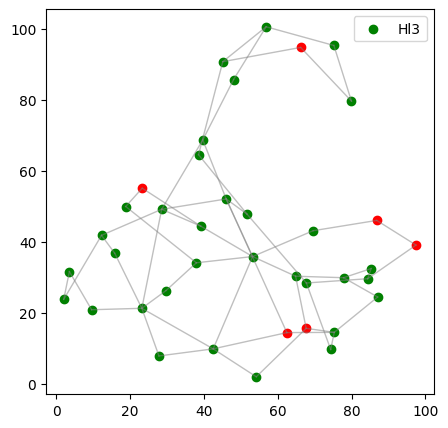

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

x, y = Node.obtain_x_y_vectors(graph.nodes)
degrees = Node.obtain_degree_vector(graph.nodes)
types = Node.obtain_type_vector(graph.nodes)
names = Node.obtain_name_vector(graph.nodes)

hl3_indices = [i for i, t in enumerate(types) if t == "HL3"]
hl2_1_indices = [i for i, t in enumerate(types) if t == "HL2-1"]

ax.scatter(
    [x[i] for i in hl3_indices],
    [y[i] for i in hl3_indices],
    marker='o',
    color='green',
    label='Hl3',
)

ax.scatter(
    [x[i] for i in hl2_1_indices],
    [y[i] for i in hl2_1_indices],
    marker='o',
    color='red'
)


for link in graph.links:
    a = link.a.pos
    b = link.b.pos
    
    ax.plot([a[0], b[0]], [a[1], b[1]], 'k-', lw=1, color='gray', alpha=0.5)

ax.legend()
plt.show()

In [10]:
with open('temporal_graph.json', 'w') as f:
    f.write(graph.model_dump_json())